In [5]:
import pandas as pd
import matplotlib as plt


In [6]:
df = pd.read_csv("ZIPS.csv")
#import the data

In [7]:
df.head()
#view original data

,Name,Team,G,PA,AB,H,2B,3B,HR,R,...,AVG,OBP,SLG,OPS,wOBA,Fld,BsR,WAR,ADP,playerid
0,Mike Trout,Angels,137,600,472,139,26,3,40,107,...,0.294,0.438,0.617,1.055,0.427,0,1.7,7.9,2.3,10155
1,Alex Bregman,Astros,154,672,560,161,39,3,34,110,...,0.288,0.399,0.550,0.949,0.395,1,0.3,7.1,15.8,17678
2,Mookie Betts,Dodgers,151,698,608,179,39,5,34,126,...,0.294,0.375,0.543,0.918,0.379,0,2.1,6.1,6.0,13611
3,Francisco Lindor,Indians,156,709,637,184,41,3,34,113,...,0.289,0.351,0.523,0.874,0.360,9,1.4,6.0,8.2,12916
4,Juan Soto,Nationals,155,678,559,165,33,5,36,115,...,0.295,0.413,0.565,0.978,0.405,-1,0.9,5.7,11.0,20123


# Who is the best power hitter

## CONCLUSIONS: Giancarlo Stanton and Pete Alonso were projected to lead HRs with 43 (z-score 4.3 above average)
## BUT Joey Gallo has the most HR/AB, projected to hit 36 home runs in a 100 game season (z-score 4.7 above average) AND Mike Trout leads Slugging Percentage (with a z-score of 3.9 better than avg)

## Edge: Joey Gallo!

First, lets look at some Home Runs

In [8]:
mask = df["HR"] == df["HR"].max()
df[mask]["Name"]
#Pete Alonso and Giancarlo Stanton Tied for most home runs

39         Peter Alonso
53    Giancarlo Stanton
Name: Name, dtype: object

How many home runs are they projected to hit?

In [9]:
df["HR"].max()

43

Let's see who will hit the least home runs

In [10]:
mask = df["HR"] == df["HR"].min()
df[mask]["Name"]
#They still have Ichiro on the list even though he retired lol

843       Ichiro Suzuki
879     Kelby Tomlinson
1090        Jose Devers
1119      Terrance Gore
1121      Engelb Vielma
1249         Luke Burch
Name: Name, dtype: object

And how many home runs will they (the least powerful players) hit?

In [11]:
df["HR"].min()
#0

0

Let's add a z-score of home runs as a new column to normalize the data
And see how much better Pete Alonso and Giancarlo Stanton are at hitting home runs

In [12]:
def HR_ZScore(x):
    df["HR_ZScore"] = (df["HR"]-df["HR"].mean())/df["HR"].std()
#this creates a new column and calculates the z-score of the HR column
df.apply(HR_ZScore)
mask = df["HR_ZScore"] == df["HR_ZScore"].max()
#this shouldn't change the data at all, should still be Pete Alonso and Giancarlo Stanton
#df[mask]["Name"] confirmed Pete Alonso and Giancarlo Stanton
df["HR_ZScore"].max()
#WOW 4 standard deviaitons above norm!

4.310634401488958

Ok lets change up the playing time adjustments by creating a rate stat for home runs per at bat

And see who hits the most HR/AB?

In [13]:
def HR_perAB(x):
    df["HR_perAB"] = df["HR"]/df["AB"]
#note these numbers are percentages
df.apply(HR_perAB)
mask = df["HR_perAB"] == df["HR_perAB"].max()
#who hits the most HR/AB?
df[mask]["Name"]
#cool, Joey Gallo that's different that the overall leader

76    Joey Gallo
Name: Name, dtype: object

And who hits the least per AB?

In [14]:
mask = df["HR_perAB"] == df["HR_perAB"].min()
df[mask]["Name"]
#this is the same as before because they all hit 0 HR!

843       Ichiro Suzuki
879     Kelby Tomlinson
1090        Jose Devers
1119      Terrance Gore
1121      Engelb Vielma
1249         Luke Burch
Name: Name, dtype: object

Lets look at the  number of at bats of the top hitters and make an assumption about the number of ABs

In [15]:
df["AB"].sort_values(ascending = False)
#600 seems like a reasonable start point

3      637
61     637
14     625
26     624
11     612
      ... 
838    125
813    116
788     98
621     45
843     31
Name: AB, Length: 1328, dtype: int64

Let's use a 600 AB start point and adjust assuming 2020 is a 100 game season (instead of 162)

And create a new total HR column

In [16]:
def HR_100G(x):
    df["HR_100G"] = df["HR_perAB"]*(600*(100/162))
df.apply(HR_100G)
df["HR_100G"] = df["HR_100G"].round(decimals = 0)
#you can't hit 1/2 a home run, so I rounded!
df

,Name,Team,G,PA,AB,H,2B,3B,HR,R,...,OPS,wOBA,Fld,BsR,WAR,ADP,playerid,HR_ZScore,HR_perAB,HR_100G
0,Mike Trout,Angels,137,600,472,139,26,3,40,107,...,1.055,0.427,0,1.7,7.9,2.3,10155,3.900088,0.084746,31.0
1,Alex Bregman,Astros,154,672,560,161,39,3,34,110,...,0.949,0.395,1,0.3,7.1,15.8,17678,3.078995,0.060714,22.0
2,Mookie Betts,Dodgers,151,698,608,179,39,5,34,126,...,0.918,0.379,0,2.1,6.1,6.0,13611,3.078995,0.055921,21.0
3,Francisco Lindor,Indians,156,709,637,184,41,3,34,113,...,0.874,0.360,9,1.4,6.0,8.2,12916,3.078995,0.053375,20.0
4,Juan Soto,Nationals,155,678,559,165,33,5,36,115,...,0.978,0.405,-1,0.9,5.7,11.0,20123,3.352693,0.064401,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Gio Brusa,NaN,110,428,391,66,16,2,13,40,...,0.553,0.238,-4,-0.2,-2.8,999.0,sa659068,0.205170,0.033248,12.0
1324,Lazaro Armenteros,Athletics,119,506,455,78,14,2,14,48,...,0.558,0.245,-10,-0.5,-2.9,999.0,sa969091,0.342019,0.030769,11.0
1325,Elier Hernandez,NaN,115,458,429,88,18,2,5,38,...,0.537,0.233,-4,-1.4,-3.0,999.0,sa659238,-0.889620,0.011655,4.0
1326,Courtney Hawkins,NaN,100,417,390,70,17,0,13,37,...,0.547,0.231,-6,-1.7,-3.0,999.0,sa657904,0.205170,0.033333,12.0


How many home runs will Joey Gallo hit in this shortened season?

In [17]:
df["HR_100G"].max()
#still 36 home runs!

36.0

How many more is this than his pre-season projection?
Remember, this assumes he becomes healthy as a result of the delayed season

In [18]:
df[df["Name"] == "Joey Gallo"]["HR"] - df[df["Name"] == "Joey Gallo"]["HR_100G"]
#wow, the projections must have him playing close to in 100 games

76    0.0
dtype: float64

Lets do the same for the home run leader, Giancarlo Stanton

In [19]:
df[df["Name"] == "Giancarlo Stanton"]["HR"] - df[df["Name"] == "Giancarlo Stanton"]["HR_100G"]
#he hit 11 home runs less in a 100 game season

53    11.0
dtype: float64

What's Joey Gallos new HR z-score?

In [20]:
(df["HR_100G"].max() - df["HR_100G"].mean())/df["HR_100G"].std()

4.71222786037315

Finally, lets analyze slugging percentage, SLG

Since this is a percentage stat, no need to do adjustments

Who is the highest?

In [21]:
mask = df["SLG"] == df["SLG"].max()
df[mask]["Name"]
#Mike Trout has the highest SLG

0    Mike Trout
Name: Name, dtype: object

What is Mike Trout's slugging?

In [22]:
df["SLG"].max()
#0.617

0.617

How much better is this than average, on a z-score basis

In [23]:
(df["SLG"].max()-df["SLG"].mean())/df["SLG"].std()
#3.9 standard deviaitons above norms

3.930018854896447

### Who is the Best at Getting On Base/Best Overall Hitter

### CONCLUSIONS: Mike Trout is the best at getting on base (OBP is 4.8 standard deviations better than the average) and the best hitter by wOBA (4.3 standard deviations above average), a complete measure of hitting ability.

### Edge: Mike Trout!

First lets look at On Base Percentage

Since this is a percentage, we don't need to make playing time adjustments

Who has the best OBP

In [24]:
mask = df["OBP"] == df["OBP"].max()
df[mask]["Name"]
#Mike Trout Leads OBP

0    Mike Trout
Name: Name, dtype: object

And what is his OBP?

In [25]:
df["OBP"].max()
#0.438, very good!

0.43799999999999994

How many standard deviations better than average is this?

In [26]:
(df["OBP"].max() - df["OBP"].mean())/df["OBP"].std()
#4.8 standard deviations above

4.753733854047292

And who has the worst OBP?

In [27]:
mask = df["OBP"] == df["OBP"].min()
df[mask]["Name"]
#Michael Davis

1170    Michael Davis
Name: Name, dtype: object

What's Michael Davis's OBP

In [28]:
df["OBP"].min() 
#0.213 Yuck!

0.213

Now lets do the same for a more complete measure of hitting abiltiy wOBA

Which weights AVG, OBP and SLG (the batters triple slash) into one measure

In [29]:
mask = df["wOBA"] == df["wOBA"].max()
df[mask]["Name"]
#Mike Trout leads on wOBA

0    Mike Trout
Name: Name, dtype: object

And what is his wOBA?

In [30]:
df["wOBA"].max()
#0.427, also very good!

0.42700000000000005

How many standard deviations better than average is this?

In [31]:
(df["wOBA"].max() - df["wOBA"].mean())/df["wOBA"].std()
#4.3 standard deviations above

4.2927182503898695

And who has the worst wOBA?

In [32]:
mask = df["wOBA"] == df["wOBA"].min()
df[mask]["Name"]
#Tim Tebow, shoulda stuck with football!

1327    Tim Tebow
Name: Name, dtype: object

What's Tim Tebow's wOBA

In [33]:
df["wOBA"].min() 
#0.205

0.205

### Who is the Best All-Around Player by WAR (which uses offense, defense and basrunning ability in its calculation)?

### CONCLUSIONS: Mike Trout is hands down the best overall player, projected for 7.9 WAR in a full season and a still great 5.8 in a 100 game season

Lets look at who would lead WAR in a full season

In [34]:
mask = df["WAR"] == df["WAR"].max()
df[mask]["Name"]
#no surprise, its Mike Trout

0    Mike Trout
Name: Name, dtype: object

What is his WAR?

In [35]:
df["WAR"].max()
#wow 7.9

7.9

Who has the least WAR?

In [36]:
mask = df["WAR"] == df["WAR"].min()
df[mask]["Name"]
#Tim Tebow

1327    Tim Tebow
Name: Name, dtype: object

And what is his WAR?

In [37]:
df["WAR"].min()
#-3.4, thats not good!

-3.4

Lets adjust the WAR column similar to what we did for HR/AB, this time all in one cell!

This time, we will do it by games played and again assume 100 games get played in 2020 instead of the standard 162

In [38]:
def WAR_perGame(x):
    df["War_perGame"] = df["WAR"]/df["G"]
df.apply(WAR_perGame)
def WAR_100G(x):
    df["WAR_100G"] = df["War_perGame"] *100
df.apply(WAR_100G)
df

,Name,Team,G,PA,AB,H,2B,3B,HR,R,...,Fld,BsR,WAR,ADP,playerid,HR_ZScore,HR_perAB,HR_100G,War_perGame,WAR_100G
0,Mike Trout,Angels,137,600,472,139,26,3,40,107,...,0,1.7,7.9,2.3,10155,3.900088,0.084746,31.0,0.057664,5.766423
1,Alex Bregman,Astros,154,672,560,161,39,3,34,110,...,1,0.3,7.1,15.8,17678,3.078995,0.060714,22.0,0.046104,4.610390
2,Mookie Betts,Dodgers,151,698,608,179,39,5,34,126,...,0,2.1,6.1,6.0,13611,3.078995,0.055921,21.0,0.040397,4.039735
3,Francisco Lindor,Indians,156,709,637,184,41,3,34,113,...,9,1.4,6.0,8.2,12916,3.078995,0.053375,20.0,0.038462,3.846154
4,Juan Soto,Nationals,155,678,559,165,33,5,36,115,...,-1,0.9,5.7,11.0,20123,3.352693,0.064401,24.0,0.036774,3.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Gio Brusa,NaN,110,428,391,66,16,2,13,40,...,-4,-0.2,-2.8,999.0,sa659068,0.205170,0.033248,12.0,-0.025455,-2.545455
1324,Lazaro Armenteros,Athletics,119,506,455,78,14,2,14,48,...,-10,-0.5,-2.9,999.0,sa969091,0.342019,0.030769,11.0,-0.024370,-2.436975
1325,Elier Hernandez,NaN,115,458,429,88,18,2,5,38,...,-4,-1.4,-3.0,999.0,sa659238,-0.889620,0.011655,4.0,-0.026087,-2.608696
1326,Courtney Hawkins,NaN,100,417,390,70,17,0,13,37,...,-6,-1.7,-3.0,999.0,sa657904,0.205170,0.033333,12.0,-0.030000,-3.000000


Now, lets see if Mike Trout still leads?

In [39]:
mask = df["WAR_100G"] == df["WAR_100G"].max()
df[mask]["Name"]
#Still Mike Trout

0    Mike Trout
Name: Name, dtype: object

And what's his WAR?

In [40]:
df["WAR_100G"].max()
#5.8, still very good

5.766423357664234

Is Tim Tebow still the worst?

In [41]:
mask = df["WAR_100G"] == df["WAR_100G"].min()
df[mask]["Name"]
#He is!

1327    Tim Tebow
Name: Name, dtype: object

And what's his WAR?

In [42]:
df["WAR_100G"].min()
#-3.7, even worse. He must be projected to play less than 100 games

-3.7362637362637363

### One Last Player Specfic Goal, Lets look at the stat line for my favorite player, Aaron Judge

### CONCLUSION: In a 100 game season, Judge will hit 28 home runs and produce 3.8 WAR. This is light in my opinion and likely reflects the original author's assumption that the pre-season injury would sap some of his ability. With the season starting late, its likely he will be fully healthy in 2020 and could surpass those numbers

Set the index so we can look at his stat line

In [43]:
df.set_index("Name", inplace = True)
df

,Team,G,PA,AB,H,2B,3B,HR,R,RBI,...,Fld,BsR,WAR,ADP,playerid,HR_ZScore,HR_perAB,HR_100G,War_perGame,WAR_100G
Name,,,,,,,,,,,,,,,,,,,,,
Mike Trout,Angels,137,600,472,139,26,3,40,107,102,...,0,1.7,7.9,2.3,10155,3.900088,0.084746,31.0,0.057664,5.766423
Alex Bregman,Astros,154,672,560,161,39,3,34,110,110,...,1,0.3,7.1,15.8,17678,3.078995,0.060714,22.0,0.046104,4.610390
Mookie Betts,Dodgers,151,698,608,179,39,5,34,126,97,...,0,2.1,6.1,6.0,13611,3.078995,0.055921,21.0,0.040397,4.039735
Francisco Lindor,Indians,156,709,637,184,41,3,34,113,93,...,9,1.4,6.0,8.2,12916,3.078995,0.053375,20.0,0.038462,3.846154
Juan Soto,Nationals,155,678,559,165,33,5,36,115,126,...,-1,0.9,5.7,11.0,20123,3.352693,0.064401,24.0,0.036774,3.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gio Brusa,NaN,110,428,391,66,16,2,13,40,40,...,-4,-0.2,-2.8,999.0,sa659068,0.205170,0.033248,12.0,-0.025455,-2.545455
Lazaro Armenteros,Athletics,119,506,455,78,14,2,14,48,44,...,-10,-0.5,-2.9,999.0,sa969091,0.342019,0.030769,11.0,-0.024370,-2.436975
Elier Hernandez,NaN,115,458,429,88,18,2,5,38,31,...,-4,-1.4,-3.0,999.0,sa659238,-0.889620,0.011655,4.0,-0.026087,-2.608696


Print his entire line, including newly created stats

In [44]:
df.loc["Aaron Judge"]

Team             Yankees
G                    120
PA                   522
AB                   435
H                    113
2B                    19
3B                     1
HR                    33
R                     84
RBI                   82
BB                    79
SO                   166
HBP                    5
SB                     5
CS                     3
AVG                 0.26
OBP                0.377
SLG                0.536
OPS                0.913
wOBA               0.379
Fld                   10
BsR                 -0.6
WAR                  4.6
ADP                 31.1
playerid           15640
HR_ZScore        2.94215
HR_perAB       0.0758621
HR_100G               28
War_perGame    0.0383333
WAR_100G         3.83333
Name: Aaron Judge, dtype: object

How many home runs in the 100 game season?

In [45]:
df.loc["Aaron Judge"]["HR_100G"]
#28 HRs, probably a little light since he will be fully healthy!

28.0

How much WAR will he accumulate over the 100 game season?

In [46]:
df.loc["Aaron Judge"]["WAR_100G"]
#3.8, I think this is a little light

3.833333333333333

For the next analysis, we dont need to re-set the index, so lets leave it for the rest of the project

Could reset if needed using df.reset_index(drop = False, inplace = True)

### Aggregate Stat Time: Let's Analyze if Strikeouts and HRs are Correlated Using Both Adjusted and Un-Adjusted Data

### CONCLUSION: There's evidence of moderate correlation in the un-adjusted data (correl = 0.49) but a weaker correlation based on rate stats (0.26) and a 100 game season adjustment (0.25).


First, lets create the Strikeouts/AB and Srikeouts/100G season columns to get it out of the way

In [47]:
def SO_perAB(x):
    df["SO_perAB"] = df["SO"]/df["AB"]
df.apply(SO_perAB)
def SO_100G(x):
    df["SO_100G"] = df["SO_perAB"]*(600*(100/162))
df.apply(SO_100G)
df


,Team,G,PA,AB,H,2B,3B,HR,R,RBI,...,WAR,ADP,playerid,HR_ZScore,HR_perAB,HR_100G,War_perGame,WAR_100G,SO_perAB,SO_100G
Name,,,,,,,,,,,,,,,,,,,,,
Mike Trout,Angels,137,600,472,139,26,3,40,107,102,...,7.9,2.3,10155,3.900088,0.084746,31.0,0.057664,5.766423,0.264831,98.085374
Alex Bregman,Astros,154,672,560,161,39,3,34,110,110,...,7.1,15.8,17678,3.078995,0.060714,22.0,0.046104,4.610390,0.158929,58.862434
Mookie Betts,Dodgers,151,698,608,179,39,5,34,126,97,...,6.1,6.0,13611,3.078995,0.055921,21.0,0.040397,4.039735,0.157895,58.479532
Francisco Lindor,Indians,156,709,637,184,41,3,34,113,93,...,6.0,8.2,12916,3.078995,0.053375,20.0,0.038462,3.846154,0.158556,58.724344
Juan Soto,Nationals,155,678,559,165,33,5,36,115,126,...,5.7,11.0,20123,3.352693,0.064401,24.0,0.036774,3.677419,0.227191,84.144968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gio Brusa,NaN,110,428,391,66,16,2,13,40,40,...,-2.8,999.0,sa659068,0.205170,0.033248,12.0,-0.025455,-2.545455,0.462916,171.450223
Lazaro Armenteros,Athletics,119,506,455,78,14,2,14,48,44,...,-2.9,999.0,sa969091,0.342019,0.030769,11.0,-0.024370,-2.436975,0.492308,182.336182
Elier Hernandez,NaN,115,458,429,88,18,2,5,38,31,...,-3.0,999.0,sa659238,-0.889620,0.011655,4.0,-0.026087,-2.608696,0.298368,110.506777


Just curious, what will the total strikeouts be in 2020 assuming a 100 game season?

In [48]:
df["SO_100G"].sum()
#135655.8, thats a lot of strikeouts

135655.81007631036

Lets see if un-adjusted strikeouts are correlated to HRs

In [49]:
#I looked this method up online since I will likely need to use it at work and could use the practice
column_1 = df["SO"]
column_2 = df["HR"]
correlation = column_1.corr(column_2)
print(correlation)
#.49 correlated, moderate correlation

0.4913211886215496


Now, lets analyze on a per_AB basis

In [50]:
column_1 = df["SO_perAB"]
column_2 = df["HR_perAB"]
correlation = column_1.corr(column_2)
print(correlation)
#hmm, its quite lower

0.2559325480984806


And lastly, let's see the correlation on the 100G stats

In [51]:
column_1 = df["SO_100G"]
column_2 = df["HR_100G"]
correlation = column_1.corr(column_2)
print(correlation)
#still much lower

0.2523178523386346


### Team Aggregates: Which Teams Have the Best Offense?

### CONCLUSIONS: Yankees are the most powerful (hitting 216 HRs by top 9 players in a 100 game season), the Braves have the best top 9 slugging percentage, Dodgers have a slight lead in top 9 wOBA but the Astros have a lead in top 9 WAR.

### EDGE: Astros, WAR is the most complete metric of player value and they lead on un-adjusted WAR and WAR/100Games.

Lets start by analyzing the un-adjusted home runs

In [52]:
team = df.groupby("Team")
team["HR"].sum().sort_values(ascending = False)
#those numbers are awfully high, probably because they include minor leaguers

Team
Dodgers         500
Yankees         453
Red Sox         443
Astros          443
Blue Jays       443
Twins           426
Angels          425
Athletics       414
Reds            412
Rangers         407
Braves          405
Brewers         404
Padres          401
Phillies        394
Indians         389
Orioles         381
Diamondbacks    376
Rockies         367
Mariners        363
Nationals       352
White Sox       348
Tigers          342
Mets            337
Rays            331
Cardinals       331
Marlins         330
Cubs            328
Royals          317
Pirates         268
Giants          254
Name: HR, dtype: int64

Lets re-do the above only counting the top 9 (the number of position players per game) entries for each team

In [53]:
team["HR"].nlargest(9).sum(level=0).sort_values(ascending=False)
#this takes the 25 largest HR hitters by team, sums it and sorts by values
#I had to look the nlargest up online
#The Yankees take the lead with 257 home runs!

Team
Yankees         257
Dodgers         235
Braves          230
Phillies        227
White Sox       227
Athletics       226
Astros          225
Reds            223
Twins           219
Indians         215
Rangers         214
Angels          210
Blue Jays       209
Rockies         208
Cubs            208
Red Sox         205
Padres          194
Diamondbacks    189
Brewers         187
Nationals       187
Mets            186
Orioles         184
Rays            183
Cardinals       181
Royals          175
Tigers          175
Mariners        170
Marlins         146
Pirates         136
Giants          134
Name: HR, dtype: int64

Now lets plot the data!

In [54]:
ax = team["HR"].nlargest(9).sum(level=0).sort_values(ascending=False).plot(kind = "bar", x = "Team", y = "HR", title = "Top 9 Player Home Runs by Team")
ax.set_ylabel("Home Runs")

Text(0, 0.5, 'Home Runs')

Now lets do the same for the 100 game season

In [55]:
team["HR_100G"].nlargest(9).sum(level=0).sort_values(ascending=False)
#Yankees still have the lead, 
#but due to my assumption of a pro-rated 600AB season likely overweights the number of ABs a power hitter would get

Team
Yankees         216.0
Twins           186.0
Dodgers         186.0
Phillies        180.0
Reds            176.0
Rangers         175.0
Athletics       172.0
Braves          172.0
White Sox       172.0
Astros          171.0
Blue Jays       170.0
Angels          167.0
Cubs            164.0
Indians         164.0
Mets            162.0
Red Sox         158.0
Rockies         157.0
Brewers         157.0
Nationals       156.0
Rays            156.0
Mariners        151.0
Cardinals       149.0
Padres          147.0
Orioles         147.0
Diamondbacks    147.0
Royals          140.0
Tigers          140.0
Marlins         127.0
Giants          120.0
Pirates         118.0
Name: HR_100G, dtype: float64

And lets plot it

Text(0, 0.5, 'Home Runs')

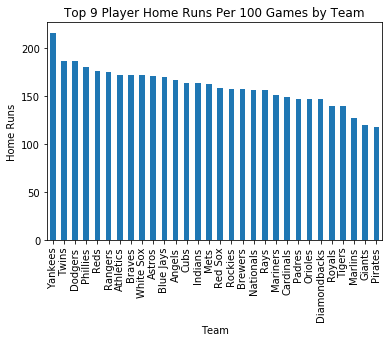

In [56]:
ax = team["HR_100G"].nlargest(9).sum(level=0).sort_values(ascending=False).plot(kind = "bar", x = "Team", y = "HR_100G", title = "Top 9 Player Home Runs Per 100 Games by Team")
ax.set_ylabel("Home Runs")
#the gap between the Yankees and the other teams has widened

Now lets look at slugging percentage (SLG)

Since this is a percentage, we can't simply sum, so we will use medians

In [57]:
team["SLG"].median().sort_values(ascending=False)
#Yankees lead on this metric as well


Team
Yankees         0.4245
Rockies         0.4110
Diamondbacks    0.4030
Dodgers         0.3940
Cubs            0.3910
Braves          0.3870
Reds            0.3860
White Sox       0.3840
Phillies        0.3835
Nationals       0.3835
Cardinals       0.3820
Twins           0.3815
Brewers         0.3810
Red Sox         0.3760
Giants          0.3760
Tigers          0.3730
Rangers         0.3700
Blue Jays       0.3690
Rays            0.3680
Orioles         0.3680
Angels          0.3670
Padres          0.3660
Indians         0.3645
Astros          0.3580
Marlins         0.3530
Mariners        0.3510
Royals          0.3500
Pirates         0.3485
Athletics       0.3450
Mets            0.3440
Name: SLG, dtype: float64

And for the top 9

In [58]:
team["SLG"].nlargest(9).median(level=0).sort_values(ascending=False)
#but based on top 9, the Braves take the lead

Team
Braves          0.499
Phillies        0.493
Astros          0.493
Yankees         0.481
Twins           0.481
Dodgers         0.481
Rockies         0.480
Athletics       0.469
Nationals       0.465
Mets            0.462
Diamondbacks    0.460
Cubs            0.458
Indians         0.455
White Sox       0.455
Angels          0.451
Blue Jays       0.451
Reds            0.449
Cardinals       0.444
Red Sox         0.444
Rangers         0.443
Brewers         0.441
Rays            0.432
Padres          0.430
Royals          0.423
Pirates         0.420
Mariners        0.418
Giants          0.417
Orioles         0.414
Marlins         0.412
Tigers          0.412
Name: SLG, dtype: float64

Slugging chart

Text(0, 0.5, 'SLG %')

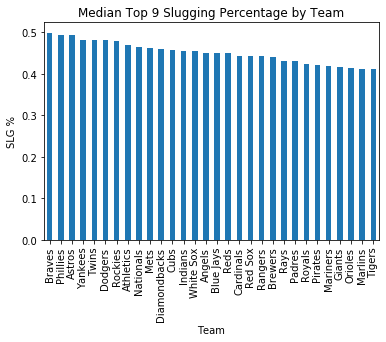

In [59]:
ax = team["SLG"].nlargest(9).median(level=0).sort_values(ascending=False).plot(kind = "bar", x = "Team", y = "SLG", title = "Median Top 9 Slugging Percentage by Team")
ax.set_ylabel("SLG %")

Lets do the same for wOBA

In [60]:
team["wOBA"].nlargest(9).median(level=0).sort_values(ascending=False)
#Dodgers lead on wOBA

Team
Dodgers         0.354
Astros          0.353
Yankees         0.349
Reds            0.348
Rockies         0.344
Twins           0.338
Cubs            0.338
Nationals       0.338
Indians         0.337
Phillies        0.337
Brewers         0.335
Athletics       0.333
Braves          0.332
Red Sox         0.331
Diamondbacks    0.331
White Sox       0.331
Mets            0.330
Rangers         0.327
Angels          0.327
Padres          0.323
Cardinals       0.323
Blue Jays       0.321
Rays            0.318
Marlins         0.314
Pirates         0.314
Tigers          0.313
Giants          0.311
Royals          0.307
Orioles         0.306
Mariners        0.297
Name: wOBA, dtype: float64

wOBA chart

Text(0, 0.5, 'Median Top 9 wOBA')

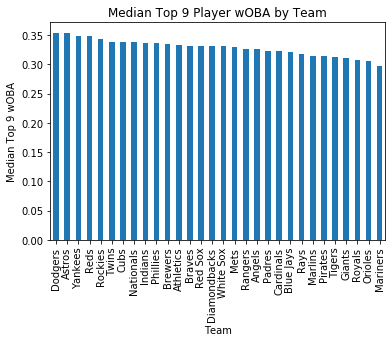

In [61]:
ax = team["wOBA"].nlargest(9).median(level=0).sort_values(ascending=False).plot(kind = "bar", x = "Team", y = "wOBA", title = "Median Top 9 Player wOBA by Team")
ax.set_ylabel("Median Top 9 wOBA")

And what is the best team by WAR (un-adjusted)

Note that WAR can be summed

In [62]:
team["WAR"].nlargest(9).sum(level=0).sort_values(ascending=False)
#Astros have the most cumulative WAR

Team
Astros          32.4
Dodgers         32.1
Yankees         27.6
Angels          25.6
Athletics       24.6
Braves          24.5
Twins           23.9
Indians         21.7
Nationals       21.7
White Sox       21.7
Phillies        21.6
Cubs            21.4
Red Sox         21.1
Diamondbacks    19.6
Cardinals       19.4
Mets            18.7
Brewers         18.6
Padres          18.5
Rays            18.0
Blue Jays       17.5
Reds            16.7
Rockies         15.0
Royals          14.1
Mariners        13.5
Rangers         12.6
Giants          11.6
Marlins         11.6
Pirates         10.9
Orioles         10.8
Tigers           9.5
Name: WAR, dtype: float64

Lets plot WAR

Text(0, 0.5, 'WAR')

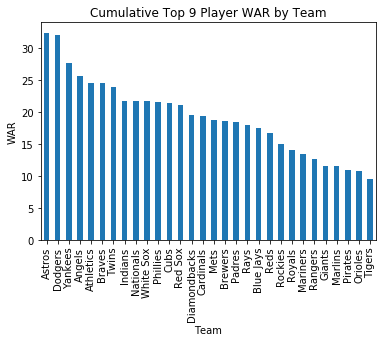

In [63]:
ax = team["WAR"].nlargest(9).sum(level=0).sort_values(ascending=False).plot(kind = "bar", x = "Team", y = "WAR",title="Cumulative Top 9 Player WAR by Team")
ax.set_ylabel("WAR")

And on the 100 game schedule?

In [64]:
team["WAR_100G"].nlargest(9).sum(level=0).sort_values(ascending=False)
#Astros keep their lead

Team
Astros          23.968221
Dodgers         23.332296
Yankees         21.569768
Angels          19.519544
Twins           19.399368
Athletics       18.836958
Braves          17.661438
White Sox       16.500686
Phillies        16.063622
Nationals       15.841748
Indians         15.657757
Cubs            15.630535
Red Sox         15.136422
Mets            14.643960
Diamondbacks    14.508663
Padres          14.486112
Cardinals       14.408983
Rays            14.215457
Brewers         14.210751
Blue Jays       14.172603
Reds            12.347622
Royals          11.466392
Mariners        11.342420
Rockies         11.189612
Rangers          9.948074
Giants           9.705949
Marlins          9.343831
Pirates          8.787765
Orioles          8.300256
Tigers           8.068796
Name: WAR_100G, dtype: float64

Finally lets plot the WAR_100G

Text(0, 0.5, 'WAR/100Games')

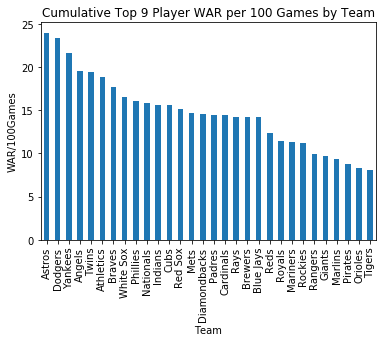

In [65]:
ax = team["WAR_100G"].nlargest(9).sum(level=0).sort_values(ascending=False).plot(kind = "bar", x = "Team", y = "WAR_100G",title = "Cumulative Top 9 Player WAR per 100 Games by Team")
ax.set_ylabel("WAR/100Games")